In [2]:
import pandas as pd
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import numpy as np

In [5]:
online_sales_df = pd.read_csv(".\dataset\Online_Sales.csv")

In [6]:
discount_coupon_df = pd.read_csv('.\dataset\Discount_Coupon.csv')

In [7]:
tax_amount_df = pd.read_excel('.\dataset\Tax_amount.xlsx')

In [8]:
marketing_spend_df = pd.read_csv('.\dataset\Marketing_Spend.csv')

In [9]:
online_sales_df.columns = online_sales_df.columns.str.lower()

In [10]:
discount_coupon_df.columns = discount_coupon_df.columns.str.lower()

In [11]:
marketing_spend_df.columns = marketing_spend_df.columns.str.lower()

In [12]:
tax_amount_df.columns = tax_amount_df.columns.str.lower()

In [13]:
discount_coupon_df['discount_pct'] = discount_coupon_df['discount_pct']/100

In [14]:
marketing_spend_df['date'] = pd.to_datetime(marketing_spend_df['date'])

In [15]:
marketing_spend_df.rename(columns={'date':'transaction_date'},inplace=True)

In [16]:
marketing_spend_df.columns,online_sales_df.columns

(Index(['transaction_date', 'offline_spend', 'online_spend'], dtype='object'),
 Index(['customerid', 'transaction_id', 'transaction_date', 'product_sku',
        'product_description', 'product_category', 'quantity', 'avg_price',
        'delivery_charges', 'coupon_status'],
       dtype='object'))

In [17]:
online_sales_df['transaction_date'] = pd.to_datetime(online_sales_df['transaction_date'])

In [18]:
online_sales_df['transaction_month'] = online_sales_df['transaction_date'].dt.month

In [19]:
discount_coupon_df['transaction_month'] = [datetime.strptime(i,'%b').month for i in discount_coupon_df['month']]

In [20]:
online_sales_df.info(),discount_coupon_df.info(),tax_amount_df.info(),marketing_spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customerid           52924 non-null  int64         
 1   transaction_id       52924 non-null  int64         
 2   transaction_date     52924 non-null  datetime64[ns]
 3   product_sku          52924 non-null  object        
 4   product_description  52924 non-null  object        
 5   product_category     52924 non-null  object        
 6   quantity             52924 non-null  int64         
 7   avg_price            52924 non-null  float64       
 8   delivery_charges     52924 non-null  float64       
 9   coupon_status        52924 non-null  object        
 10  transaction_month    52924 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(4)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entri

(None, None, None, None)

In [21]:
discount_coupon_df.drop(columns=['month'],inplace= True)

In [22]:
merge_frame = online_sales_df.merge(discount_coupon_df,'left',on=['transaction_month','product_category']).merge(tax_amount_df,'left',on=['product_category']).merge(marketing_spend_df,'left',on=['transaction_date'])

In [23]:
merge_frame.isna().sum()

customerid               0
transaction_id           0
transaction_date         0
product_sku              0
product_description      0
product_category         0
quantity                 0
avg_price                0
delivery_charges         0
coupon_status            0
transaction_month        0
coupon_code            400
discount_pct           400
gst                      0
offline_spend            0
online_spend             0
dtype: int64

In [24]:
null_rows = merge_frame[merge_frame.isnull().any(axis=1)]

In [25]:
null_rows

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,transaction_month,coupon_code,discount_pct,gst,offline_spend,online_spend
62,17850,16704,2019-01-01,GGOEYOBR078599,YouTube Luggage Tag,Fun,4,9.27,6.50,Used,1,NaN,NaN,0.18,4500,2424.50
95,14688,16742,2019-01-02,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,103.15,6.50,Clicked,1,NaN,NaN,0.10,4500,3480.36
157,18074,16782,2019-01-02,GGOEGOBC078699,Google Luggage Tag,Fun,1,7.42,6.50,Used,1,NaN,NaN,0.18,4500,3480.36
178,16029,16800,2019-01-02,GGOEAOBH078799,Android Luggage Tag,Fun,2,7.42,6.50,Not Used,1,NaN,NaN,0.18,4500,3480.36
193,16250,16812,2019-01-02,GGOEGDHG082499,Google 25 oz Clear Stainless Steel Bottle,Google,1,11.54,17.96,Clicked,1,NaN,NaN,0.10,4500,3480.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44213,12472,42109,2019-10-30,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Clicked,10,NaN,NaN,0.10,2000,780.15
45167,14911,42756,2019-11-07,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Not Used,11,NaN,NaN,0.10,3500,1252.63
45807,18125,43244,2019-11-12,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,99.99,6.00,Clicked,11,NaN,NaN,0.10,4000,3390.82
46239,17180,43537,2019-11-15,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Used,11,NaN,NaN,0.10,4000,737.08


In [26]:
set_1 = set(discount_coupon_df['product_category'].unique())

In [27]:
set_2 = set(null_rows['product_category'].unique())

In [28]:
set_2.issubset(set_1)

False

these null rows have null values because for these products no discount is allowed
so we will be replacing null values of discount pct with 0 and coupun code with no coupun

In [29]:
merge_frame['discount_pct'].fillna(.0,inplace=True)

In [30]:
merge_frame['coupon_code'].fillna('ZERO_OFF"',inplace=True)

In [31]:
merge_frame.isna().sum()

customerid             0
transaction_id         0
transaction_date       0
product_sku            0
product_description    0
product_category       0
quantity               0
avg_price              0
delivery_charges       0
coupon_status          0
transaction_month      0
coupon_code            0
discount_pct           0
gst                    0
offline_spend          0
online_spend           0
dtype: int64

Business Objective:
The e-commerce company is expecting below analysis using the data

Calculate Invoice amount or sale_amount or revenue for each transaction and item level
Invoice Value =(( QuantityAvg_price)(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [32]:
merge_frame

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,transaction_month,coupon_code,discount_pct,gst,offline_spend,online_spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,ELEC10,0.1,0.10,4500,2424.50
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,ELEC10,0.1,0.10,4500,2424.50
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,1,OFF10,0.1,0.10,4500,2424.50
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,1,SALE10,0.1,0.18,4500,2424.50
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,1,AIO10,0.1,0.18,4500,2424.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,12,ELEC30,0.3,0.10,4000,2058.75
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,12,SALE30,0.3,0.18,4000,2058.75
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,12,ELEC30,0.3,0.10,4000,2058.75
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,12,ELEC30,0.3,0.10,4000,2058.75


In [33]:
merge_frame['coupon_status'][0]

'Used'

In [34]:
merge_frame

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,transaction_month,coupon_code,discount_pct,gst,offline_spend,online_spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,ELEC10,0.1,0.10,4500,2424.50
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,ELEC10,0.1,0.10,4500,2424.50
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,1,OFF10,0.1,0.10,4500,2424.50
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,1,SALE10,0.1,0.18,4500,2424.50
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,1,AIO10,0.1,0.18,4500,2424.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,12,ELEC30,0.3,0.10,4000,2058.75
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,12,SALE30,0.3,0.18,4000,2058.75
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,12,ELEC30,0.3,0.10,4000,2058.75
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,12,ELEC30,0.3,0.10,4000,2058.75


In [35]:
 merge_frame[['quantity','avg_price','discount_pct','coupon_status']]

,quantity,avg_price,discount_pct,coupon_status
0,1,153.71,0.1,Used
1,1,153.71,0.1,Used
2,1,2.05,0.1,Used
3,5,17.53,0.1,Not Used
4,1,16.50,0.1,Used
...,...,...,...,...
52919,1,121.30,0.3,Clicked
52920,1,48.92,0.3,Used
52921,1,151.88,0.3,Used
52922,5,80.52,0.3,Clicked


In [36]:
for i in range(len(merge_frame[['quantity','avg_price','discount_pct','coupon_status']])):
    if merge_frame['coupon_status'][i] == 'Used':
        ((merge_frame['quantity'][i] *merge_frame['avg_price'][i]) * (1 - merge_frame['discount_pct'][i]))
    else:
        (merge_frame['quantity'][i] *merge_frame['avg_price'][i])

In [37]:
merge_frame['invoice_value'] = [
    ((merge_frame['quantity'][i] * merge_frame['avg_price'][i]) * (1 - merge_frame['discount_pct'][i])* (1 + merge_frame['gst'][i]) +  merge_frame['delivery_charges'][i])
      if 
      merge_frame['coupon_status'][i] == 'Used' 
      else 
      (merge_frame['quantity'][i] * merge_frame['avg_price'][i]* (1 + merge_frame['gst'][i]) +  merge_frame['delivery_charges'][i]) 
      for i in range(len(merge_frame[['quantity','avg_price','discount_pct','coupon_status']]))]

In [38]:
merge_frame.isna().sum()

customerid             0
transaction_id         0
transaction_date       0
product_sku            0
product_description    0
product_category       0
quantity               0
avg_price              0
delivery_charges       0
coupon_status          0
transaction_month      0
coupon_code            0
discount_pct           0
gst                    0
offline_spend          0
online_spend           0
invoice_value          0
dtype: int64

In [39]:
merge_frame.head(5)

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,transaction_month,coupon_code,discount_pct,gst,offline_spend,online_spend,invoice_value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,0.1,0.10,4500,2424.5,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,0.1,0.10,4500,2424.5,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,OFF10,0.1,0.10,4500,2424.5,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,SALE10,0.1,0.18,4500,2424.5,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,AIO10,0.1,0.18,4500,2424.5,24.0230


Detailed exploratory analysis

Defining the Retention Period: Decide on the time frame over which you want to measure customer retention.

Understanding how many customers acquired every month

In [40]:
merge_frame.sort_values('transaction_date',inplace=True)

In [41]:
merge_frame['acquisition_month'] = merge_frame['transaction_date'].dt.to_period('m')


In [42]:
merge_frame['acquisition_month']

0        2019-01
64       2019-01
63       2019-01
62       2019-01
61       2019-01
          ...   
52876    2019-12
52874    2019-12
52873    2019-12
52880    2019-12
52923    2019-12
Name: acquisition_month, Length: 52924, dtype: period[M]

In [43]:
acquisition_per_month = merge_frame.groupby('acquisition_month').size()

In [44]:
acquisition_month = acquisition_per_month.index.strftime('%m')

In [45]:
acquisition_month

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='acquisition_month')

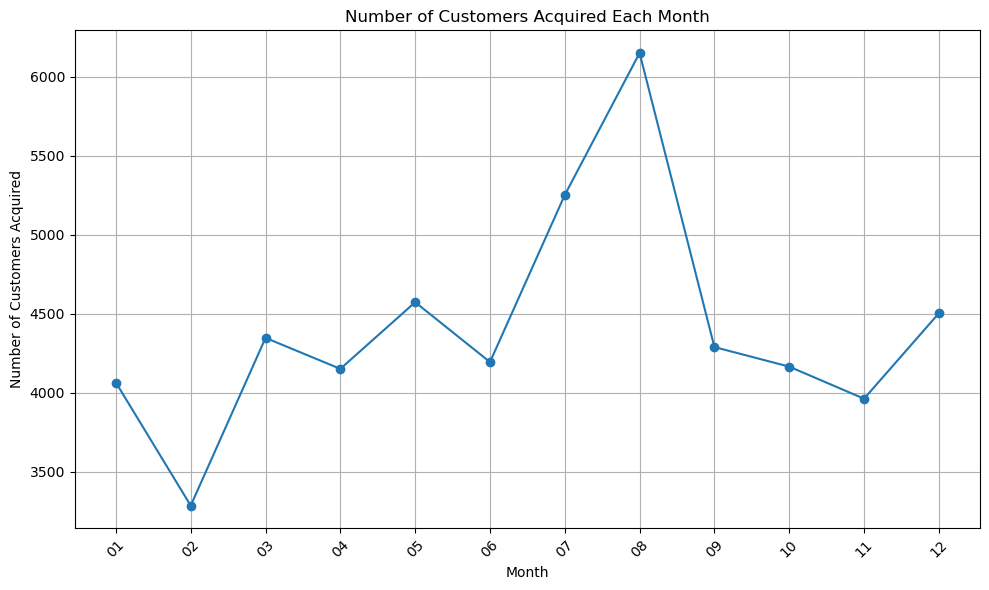

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(acquisition_month, acquisition_per_month.values, marker='o', linestyle='-')
plt.title('Number of Customers Acquired Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers Acquired')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart illustrates the number of customers acquired each month over a year. Here are the key observations:

Initial Drop and Recovery (Jan-Feb): There is a notable drop in customer acquisition in February, with the lowest count for the year, followed by a sharp increase in March.

Steady Growth and Peaks (Mar-Aug): After recovering in March, the number of customers acquired shows a general upward trend, with some fluctuations. The peak acquisition occurs in August, indicating a significant spike in customer growth during this month.

Decline and Stabilization (Sep-Dec): Following the peak in August, there is a steep decline in September. The subsequent months (October to December) show a relatively stable but lower acquisition rate compared to the earlier peak, with a minor increase in December.

Overall Trends: The data suggests seasonal or cyclical trends in customer acquisition, with high acquisition periods around mid-year and lower acquisition towards the end of the year.

Understand the retention of customers on month on month basis

In [47]:
merge_frame['acquisition_month']= merge_frame['acquisition_month'].dt.month

In [48]:
subset = {}
for value , group in merge_frame.groupby('acquisition_month'):
    subset[value] = pd.DataFrame(group)

In [49]:
month_1_customer = set(subset.get(1)['customerid'])
month_2_customer = set(subset.get(2)['customerid'])
month_3_customer = set(subset.get(3)['customerid'])
month_4_customer = set(subset.get(4)['customerid'])
month_5_customer = set(subset.get(5)['customerid'])
month_6_customer = set(subset.get(6)['customerid'])
month_7_customer = set(subset.get(7)['customerid'])
month_8_customer = set(subset.get(8)['customerid'])
month_9_customer = set(subset.get(9)['customerid'])
month_10_customer = set(subset.get(10)['customerid'])
month_11_customer = set(subset.get(11)['customerid'])
month_12_customer = set(subset.get(12)['customerid'])

In [50]:
rentention_1 = month_1_customer.intersection(month_2_customer ).__len__()
rentention_2 = month_2_customer.intersection(month_3_customer ).__len__()
rentention_3 = month_3_customer.intersection(month_4_customer).__len__()
rentention_4 = month_4_customer.intersection(month_5_customer).__len__()
rentention_5 = month_5_customer.intersection(month_6_customer).__len__()
rentention_6 = month_6_customer.intersection(month_7_customer).__len__()
rentention_7 = month_7_customer.intersection(month_8_customer).__len__()
rentention_8 = month_8_customer.intersection(month_9_customer).__len__()
rentention_9 = month_9_customer.intersection(month_10_customer).__len__()
rentention_10 = month_10_customer.intersection(month_11_customer).__len__()
rentention_11 = month_11_customer.intersection(month_12_customer).__len__()

In [51]:
retention_list = [rentention_1,rentention_2,rentention_3,rentention_4,rentention_5,rentention_6,rentention_7,rentention_8,rentention_9,rentention_10,rentention_11]

In [52]:
retention_list

[13, 11, 24, 25, 37, 58, 65, 44, 29, 31, 28]

In [53]:
acquisition_mon_1 = month_1_customer.__len__()
acquisition_mon_2 = month_2_customer.difference(month_1_customer).__len__()
acquisition_mon_3 = month_3_customer.difference(month_2_customer).__len__()
acquisition_mon_4 = month_4_customer.difference(month_3_customer).__len__()
acquisition_mon_5 = month_5_customer.difference(month_4_customer).__len__()
acquisition_mon_6 = month_6_customer.difference(month_5_customer).__len__()
acquisition_mon_7 = month_7_customer.difference(month_6_customer).__len__()
acquisition_mon_8 = month_8_customer.difference(month_7_customer).__len__()
acquisition_mon_9 = month_9_customer.difference(month_8_customer).__len__()
acquisition_mon_10 = month_10_customer.difference(month_9_customer).__len__()
acquisition_mon_11 = month_11_customer.difference(month_10_customer).__len__()
acquisition_mon_12 = month_12_customer.difference(month_11_customer).__len__()

In [54]:
acquisition_mon_1, acquisition_mon_2,acquisition_mon_3,acquisition_mon_4,acquisition_mon_5,acquisition_mon_6,acquisition_mon_7,acquisition_mon_8,acquisition_mon_9,acquisition_mon_10,acquisition_mon_11,acquisition_mon_12

(215, 96, 197, 200, 175, 222, 178, 235, 149, 181, 157, 208)

Calculating Retention Rate :  Calculate the retention rate for each cohort by dividing the number of retained customers in each subsequent month by the total number of customers in the initial cohort.


In [55]:
retention_rates = []
for i in retention_list:
    x = ((i / acquisition_mon_1)*100).__round__(2)
    retention_rates.append(x)

print(retention_rates)

[6.05, 5.12, 11.16, 11.63, 17.21, 26.98, 30.23, 20.47, 13.49, 14.42, 13.02]


Visualizing Retention on monthly basis 

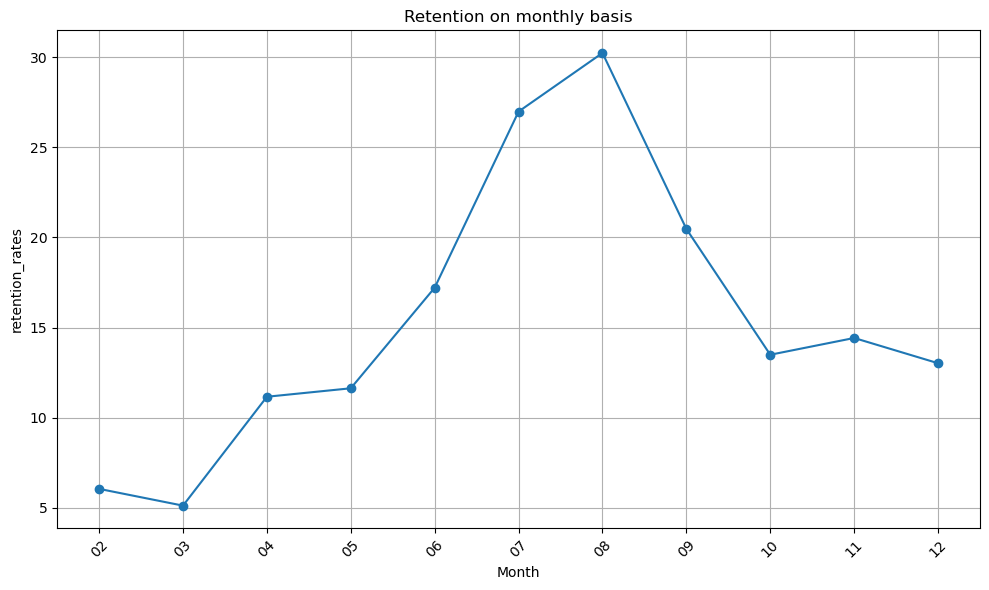

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(acquisition_month[1:], retention_rates, marker='o', linestyle='-')
plt.title('Retention on monthly basis')
plt.xlabel('Month')
plt.ylabel('retention_rates')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart illustrates customer retention rates on a monthly basis. Here are the key observations:

Initial Low Retention (Feb-Mar): The retention rates start low in February and reach their minimum in March. This indicates that fewer customers acquired in the early part of the year were retained.

Gradual Increase (Mar-Jul): From March onwards, there is a steady increase in retention rates, peaking in July. This suggests successful retention strategies or increased customer satisfaction during these months.

Sharp Decline (Aug-Oct): Following the peak in July, there is a sharp decline in retention rates, bottoming out in October. This might indicate seasonal changes, customer churn, or other external factors affecting retention.

Stabilization (Oct-Dec): After October, the retention rates stabilize, with minor fluctuations. The rates in November and December are relatively steady but lower than the peak months.

understading the effect of marketing expenses

In [57]:
sales_exp = merge_frame.groupby('acquisition_month')[['offline_spend', 'online_spend', 'invoice_value']].sum()

In [58]:
sales_exp['online_spend_nearest_M'] = (sales_exp['online_spend']/1e6).round()
sales_exp['invoice_value_nearest_M'] = (sales_exp['invoice_value']/1e5).round()
sales_exp['offline_spend_nearest_M'] = (sales_exp['offline_spend']/1e6).round()


In [59]:
sales_exp

,offline_spend,online_spend,invoice_value,online_spend_nearest_M,invoice_value_nearest_M,offline_spend_nearest_M
acquisition_month,,,,,,
1,12365900,7686875.17,494090.54875,8.0,5.0,12.0
2,9481400,6360136.05,375162.04730,6.0,4.0,9.0
3,10488500,6965280.31,415157.79044,7.0,4.0,10.0
4,13459000,8196922.13,477498.59102,8.0,5.0,13.0
5,9951500,7574021.02,365596.02956,8.0,4.0,10.0
6,11189000,7436403.73,361000.17429,7.0,4.0,11.0
7,11563000,9055934.41,451878.40904,9.0,5.0,12.0
8,16834500,11551233.77,475796.87554,12.0,5.0,17.0
9,11886500,7371126.34,396510.49254,7.0,4.0,12.0


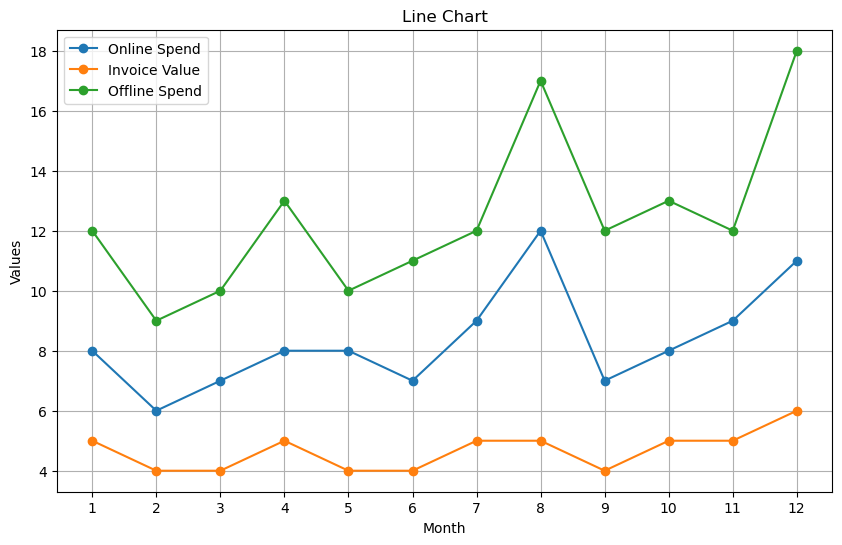

In [60]:
# Plotting the lines
plt.figure(figsize=(10,6))
plt.plot(sales_exp['online_spend_nearest_M'], marker='o', label='Online Spend')
plt.plot(sales_exp['invoice_value_nearest_M'], marker='o', label='Invoice Value')
plt.plot(sales_exp['offline_spend_nearest_M'], marker='o', label='Offline Spend')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Line Chart')
plt.xticks( sales_exp.index.values)
plt.legend()
plt.grid(True)

plt.show()


The line chart displays the trends of Online Spend, Invoice Value, and Offline Spend over the course of a year. Here are the key observations:

Online Spend:

The blue line shows a steady increase in online spending over the months, with noticeable peaks in August and December.
The upward trend suggests a continuous investment in online marketing, potentially aligning with significant promotional periods or campaigns.
Offline Spend:

The green line indicates fluctuations in offline spending, with prominent peaks in January, May, August, and December.
Offline spend shows more volatility compared to online spend, possibly reflecting periodic offline marketing campaigns or seasonal advertising efforts.
Invoice Value:

The orange line remains relatively flat throughout the year, with a slight upward trend towards the end of the year.
Despite the variations in online and offline spending, the invoice value shows less pronounced changes, indicating other factors might influence revenue beyond just marketing spend.

 How the revenues from existing/new customers on month on month basis

Define Existing and New Customers:
Existing customers are those who made purchases in previous months.
New customers are those who made their first purchase in the current month.

nc = new customers , 
oc = old customers

In [61]:
nc_mnth_1 = list(month_1_customer)

nc_mnth_2 = list(month_2_customer.difference(month_1_customer))
oc_mnth_2 = list(month_2_customer.intersection(month_1_customer))

nc_mnth_3 = list(month_3_customer.difference(month_2_customer))
oc_mnth_3 = list(month_3_customer.intersection(month_2_customer))

nc_mnth_4 = list(month_4_customer.difference(month_3_customer))
oc_mnth_4 = list(month_4_customer.intersection(month_3_customer))

nc_mnth_5 = list(month_5_customer.difference(month_4_customer))
oc_mnth_5 = list(month_5_customer.intersection(month_4_customer))

nc_mnth_6 = list(month_6_customer.difference(month_5_customer))
oc_mnth_6 = list(month_6_customer.intersection(month_5_customer))

nc_mnth_7 = list(month_7_customer.difference(month_6_customer))
oc_mnth_7 = list(month_7_customer.intersection(month_6_customer))

nc_mnth_8 = list(month_8_customer.difference(month_7_customer))
oc_mnth_8 = list(month_8_customer.intersection(month_7_customer))

nc_mnth_9 = list(month_9_customer.difference(month_8_customer))
oc_mnth_9 = list(month_9_customer.intersection(month_8_customer))

nc_mnth_10 = list(month_10_customer.difference(month_9_customer))
oc_mnth_10 = list(month_10_customer.intersection(month_9_customer))

nc_mnth_11 = list(month_11_customer.difference(month_10_customer))
oc_mnth_11 = list(month_11_customer.intersection(month_10_customer))

nc_mnth_12 = list(month_12_customer.difference(month_11_customer))
oc_mnth_12 = list(month_12_customer.intersection(month_11_customer))

calculating total sales of new customers

In [62]:
nc_mnth_1_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_1)][merge_frame['acquisition_month']==1]['invoice_value'].sum()/1e4).round(0)
nc_mnth_2_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_2)][merge_frame['acquisition_month']==2]['invoice_value'].sum()/1e4).round(0)
nc_mnth_3_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_3)][merge_frame['acquisition_month']==3]['invoice_value'].sum()/1e4).round(0)
nc_mnth_4_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_4)][merge_frame['acquisition_month']==4]['invoice_value'].sum()/1e4).round(0)
nc_mnth_5_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_5)][merge_frame['acquisition_month']==5]['invoice_value'].sum()/1e4).round(0)
nc_mnth_6_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_6)][merge_frame['acquisition_month']==6]['invoice_value'].sum()/1e4).round(0)
nc_mnth_7_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_7)][merge_frame['acquisition_month']==7]['invoice_value'].sum()/1e4).round(0)
nc_mnth_8_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_8)][merge_frame['acquisition_month']==8]['invoice_value'].sum()/1e4).round(0)
nc_mnth_9_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_9)][merge_frame['acquisition_month']==9]['invoice_value'].sum()/1e4).round(0)
nc_mnth_10_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_10)][merge_frame['acquisition_month']==10]['invoice_value'].sum()/1e4).round(0)
nc_mnth_11_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_11)][merge_frame['acquisition_month']==11]['invoice_value'].sum()/1e4).round(0)
nc_mnth_12_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_12)][merge_frame['acquisition_month']==12]['invoice_value'].sum()/1e4).round(0)

C:\Users\Mohdd\AppData\Local\Temp\ipykernel_1600\1033957423.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nc_mnth_1_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_1)][merge_frame['acquisition_month']==1]['invoice_value'].sum()/1e4).round(0)
C:\Users\Mohdd\AppData\Local\Temp\ipykernel_1600\1033957423.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nc_mnth_2_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_2)][merge_frame['acquisition_month']==2]['invoice_value'].sum()/1e4).round(0)
C:\Users\Mohdd\AppData\Local\Temp\ipykernel_1600\1033957423.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nc_mnth_3_sales = (merge_frame[merge_frame['customerid'].isin(nc_mnth_3)][merge_frame['acquisition_month']==3]['invoice_value'].sum()/1e4).round(0)
C:\Users\Mohdd\AppData\Local\Temp\ipykernel_1600\1033957423.py:4: UserWarning: Boolean Series key will be reindexed to match

In [63]:
nc_sales = [nc_mnth_1_sales, nc_mnth_2_sales, nc_mnth_3_sales, nc_mnth_4_sales, nc_mnth_5_sales, nc_mnth_6_sales, nc_mnth_7_sales, nc_mnth_8_sales, nc_mnth_9_sales, nc_mnth_10_sales, nc_mnth_11_sales, nc_mnth_12_sales]

calculating sales of old customers

In [64]:
oc_mnth_2_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_2)][merge_frame['acquisition_month']==2]['invoice_value'].sum()/1e4).round(0)
oc_mnth_3_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_3)][merge_frame['acquisition_month']==3]['invoice_value'].sum()/1e4).round(0)
oc_mnth_4_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_4)][merge_frame['acquisition_month']==4]['invoice_value'].sum()/1e4).round(0)
oc_mnth_5_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_5)][merge_frame['acquisition_month']==5]['invoice_value'].sum()/1e4).round(0)
oc_mnth_6_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_6)][merge_frame['acquisition_month']==6]['invoice_value'].sum()/1e4).round(0)
oc_mnth_7_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_7)][merge_frame['acquisition_month']==7]['invoice_value'].sum()/1e4).round(0)
oc_mnth_8_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_8)][merge_frame['acquisition_month']==8]['invoice_value'].sum()/1e4).round(0)
oc_mnth_9_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_9)][merge_frame['acquisition_month']==9]['invoice_value'].sum()/1e4).round(0)
oc_mnth_10_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_10)][merge_frame['acquisition_month']==10]['invoice_value'].sum()/1e4).round(0)
oc_mnth_11_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_11)][merge_frame['acquisition_month']==11]['invoice_value'].sum()/1e4).round(0)
oc_mnth_12_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_12)][merge_frame['acquisition_month']==12]['invoice_value'].sum()/1e4).round(0)

C:\Users\Mohdd\AppData\Local\Temp\ipykernel_1600\424708941.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  oc_mnth_2_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_2)][merge_frame['acquisition_month']==2]['invoice_value'].sum()/1e4).round(0)
C:\Users\Mohdd\AppData\Local\Temp\ipykernel_1600\424708941.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  oc_mnth_3_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_3)][merge_frame['acquisition_month']==3]['invoice_value'].sum()/1e4).round(0)
C:\Users\Mohdd\AppData\Local\Temp\ipykernel_1600\424708941.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  oc_mnth_4_sales = (merge_frame[merge_frame['customerid'].isin(oc_mnth_4)][merge_frame['acquisition_month']==4]['invoice_value'].sum()/1e4).round(0)
C:\Users\Mohdd\AppData\Local\Temp\ipykernel_1600\424708941.py:4: UserWarning: Boolean Series key will be reindexed to match Dat

In [65]:
oc_sales = [oc_mnth_2_sales, oc_mnth_3_sales, oc_mnth_4_sales, oc_mnth_5_sales, oc_mnth_6_sales, oc_mnth_7_sales, oc_mnth_8_sales, oc_mnth_9_sales, oc_mnth_10_sales, oc_mnth_11_sales, oc_mnth_12_sales]

vizualizing the sales of new customers to old customers

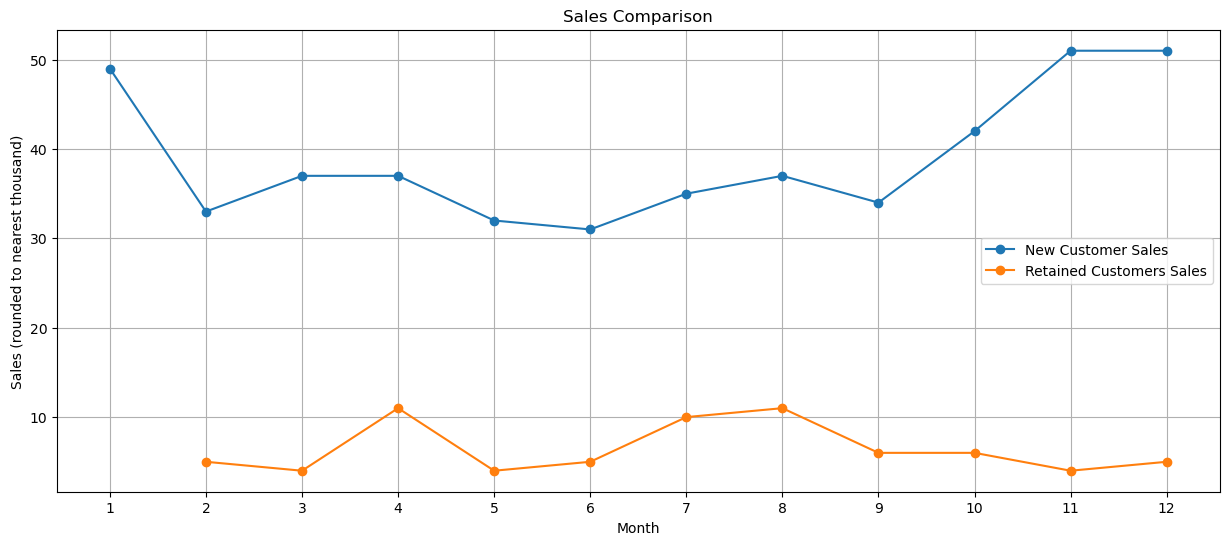

In [66]:
months = np.arange(1, 13)  
plt.figure(figsize=(15, 6))
plt.plot(months, nc_sales, marker='o', label='New Customer Sales')
plt.plot(months[1:], oc_sales, marker='o', label='Retained Customers Sales')
plt.xlabel('Month')  
plt.ylabel('Sales (rounded to nearest thousand)')  
plt.xticks(months) 
plt.legend()
plt.title('Sales Comparison') 
plt.grid(True)  
plt.show()



The graph illustrates the comparison between sales from new customers and retained customers on a monthly basis over a year. Here are the key observations:

New Customer Sales:

Strong Start: Sales from new customers are at their highest in the first month.
Initial Decline and Plateau: After the peak in the first month, there is a noticeable drop in sales, which then stabilize with minor fluctuations for several months.
Year-End Surge: Toward the end of the year, sales from new customers rise again, reaching a peak similar to the first month.
Retained Customer Sales:

Lower Sales Throughout: Sales from retained customers remain consistently lower compared to new customers.
Minor Variations: There are small increases in certain months, but overall sales from retained customers stay relatively flat.

How the discounts playing role in the revenues?

In [67]:
rev_dis = merge_frame.groupby(['acquisition_month','discount_pct'])['invoice_value'].sum().to_frame()

In [68]:
rev_dis['invoice_value'].values

array([3.79602460e+03, 4.90294524e+05, 3.56589300e+03, 3.71596154e+05,
       5.88123240e+03, 4.09276558e+05, 6.02481020e+03, 4.71473781e+05,
       4.91833120e+03, 3.60677698e+05, 2.70507860e+03, 3.58295096e+05,
       4.19813600e+03, 4.47680273e+05, 2.46139520e+03, 4.73335480e+05,
       1.08013440e+03, 3.95430358e+05, 1.89834900e+03, 4.78869021e+05,
       4.19956000e+02, 5.47368170e+05, 5.56112292e+05])

In [69]:
rev_dis.columns

Index(['invoice_value'], dtype='object')

In [70]:
rev_dis

invoice_value
acquisition_month discount_pct               
1                 0.0              3796.02460
                  0.1            490294.52415
2                 0.0              3565.89300
                  0.2            371596.15430
3                 0.0              5881.23240
                  0.3            409276.55804
4                 0.0              6024.81020
                  0.1            471473.78082
5                 0.0              4918.33120
                  0.2            360677.69836
6                 0.0              2705.07860
                  0.3            358295.09569
7                 0.0              4198.13600
                  0.1            447680.27304
8                 0.0              2461.39520
                  0.2            473335.48034
9                 0.0              1080.13440
                  0.3            395430.35814
10                0.0              1898.34900
                  0.1            478869.02081
11                0.0               419.95600
                  0.2            547368.17026
12                0.3            556112.29179

In [71]:
rev_dis.index.levels[1]

Index([0.0, 0.1, 0.2, 0.3], dtype='float64', name='discount_pct')

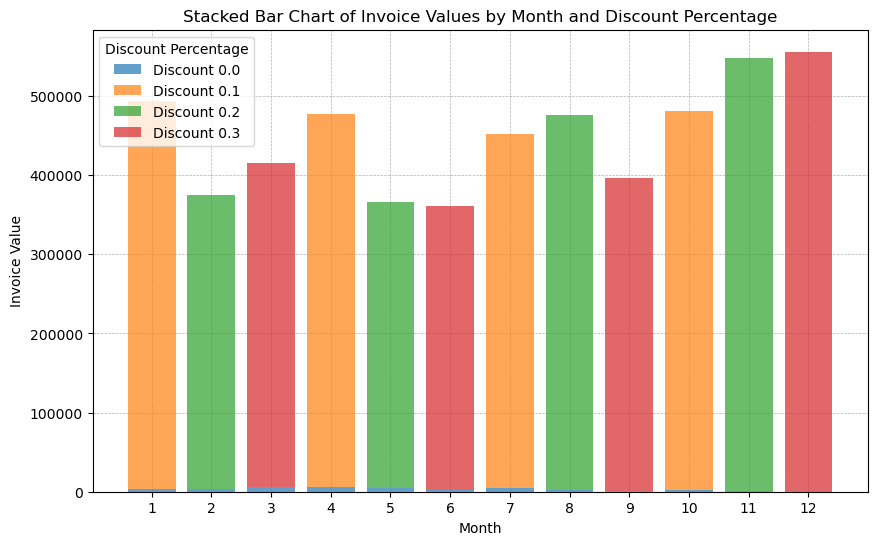

In [72]:
acquisition_month_values = rev_dis.index.levels[0]
discount_pct_values = rev_dis.index.levels[1]
invoice_value = rev_dis['invoice_value']

bar_heights = []

for discount_pct in discount_pct_values:
    invoice_values = [invoice_value.get((month, discount_pct), 0) for month in acquisition_month_values]
    bar_heights.append(invoice_values)

bar_heights = np.array(bar_heights)
bottom_values = np.zeros(len(acquisition_month_values))

plt.figure(figsize=(10, 6))
for i in range(len(discount_pct_values)):
    plt.bar(acquisition_month_values, bar_heights[i], label=f'Discount {discount_pct_values[i]}', alpha=0.7, zorder=3,bottom=bottom_values)
    bottom_values += bar_heights[i]

plt.xlabel('Month')
plt.ylabel('Invoice Value')
plt.title('Stacked Bar Chart of Invoice Values by Month and Discount Percentage')
plt.legend(title='Discount Percentage')
plt.xticks(acquisition_month_values)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
plt.show()


The stacked bar chart shows the distribution of invoice values across different months and discount percentages. Here's an analysis of how the discounts influence the revenues:

Discount 0.0 (No Discount):
This category is almost non-existent in most months, indicating that most sales involve some level of discount.
When present, it contributes minimally to the total invoice value.

Discount 0.1 (10% Discount):
Significant contribution in the first month and consistently present in many other months.
Peaks notably in the first, fourth, ninth, and tenth months, indicating strategic use of moderate discounts to drive sales during these periods.

Discount 0.2 (20% Discount):
High contribution in several months, particularly the middle and end of the year.
Peaks in the fourth, seventh, eighth, and eleventh months, showing the company often offers larger discounts during these periods to boost invoice values.

Discount 0.3 (30% Discount):
Substantial presence in some months, particularly noticeable towards the end of the year.
Peaks in the third, sixth, and twelfth months, indicating the use of heavy discounts to maximize sales during these months, potentially aligning with end-of-quarter or year-end sales strategies.

How number order varies and sales with different days?

In [73]:
daily_summary = merge_frame.groupby('transaction_date').agg({'quantity': 'sum', 'invoice_value': 'sum'}).reset_index()

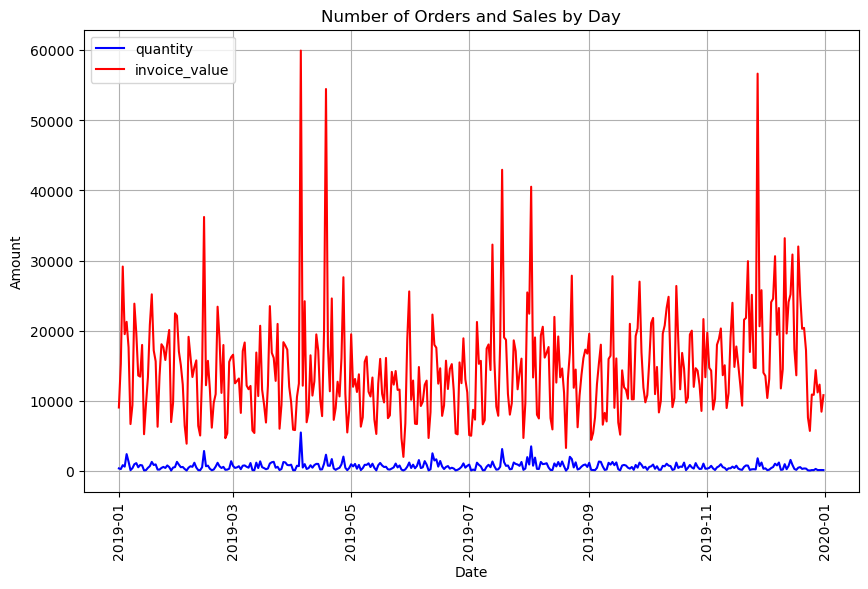

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(daily_summary['transaction_date'], daily_summary['quantity'], label='quantity', color='blue')
plt.plot(daily_summary['transaction_date'], daily_summary['invoice_value'], label='invoice_value', color='red')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Number of Orders and Sales by Day')

plt.legend()
plt.grid(True)

plt.xticks(rotation=90)

plt.show()



The graph illustrates the daily variations in the number of orders and sales (invoice value) over the course of a year. Here are the key observations:

Number of Orders (Blue Line):

Consistent but Low Volume: The number of orders remains relatively consistent throughout the year with minor fluctuations.
Small Peaks: There are occasional small spikes in the number of orders, but these are not as pronounced as the variations in sales.

Sales (Invoice Value) (Red Line):

High Variability: The invoice value shows significant day-to-day fluctuations, indicating varying sales volumes.
Frequent Spikes: There are numerous sharp peaks in sales throughout the year, suggesting days with exceptionally high sales.
Seasonal Trends: Larger spikes appear periodically, with notable increases around March, May, and December, indicating higher sales during these periods.


Calculate the Revenue, Marketing spend, percentage of marketing spend out of
revenue, Tax, percentage of delivery charges by month.



In [75]:
merge_frame['tax_paid'] = (merge_frame['avg_price'] * merge_frame['quantity'])*merge_frame['gst']

In [76]:
merge_frame['total_markerting_exp'] = merge_frame['offline_spend'] + merge_frame['online_spend']

In [77]:
monthly_summary = merge_frame.groupby('transaction_month').agg({'invoice_value': 'sum','total_markerting_exp':'sum','tax_paid':'sum','delivery_charges':'sum'}).reset_index()

In [78]:
monthly_summary['marketing_spend_percentage'] = (monthly_summary['total_markerting_exp']/monthly_summary['invoice_value'])*100

In [79]:
monthly_summary['delivery_charges_percentage'] = (monthly_summary['delivery_charges'] / monthly_summary['invoice_value']) * 100

In [80]:
monthly_summary['invoice_percent_m-exp'] = ((monthly_summary['invoice_value']/monthly_summary['total_markerting_exp'])*100)

<Axes: >

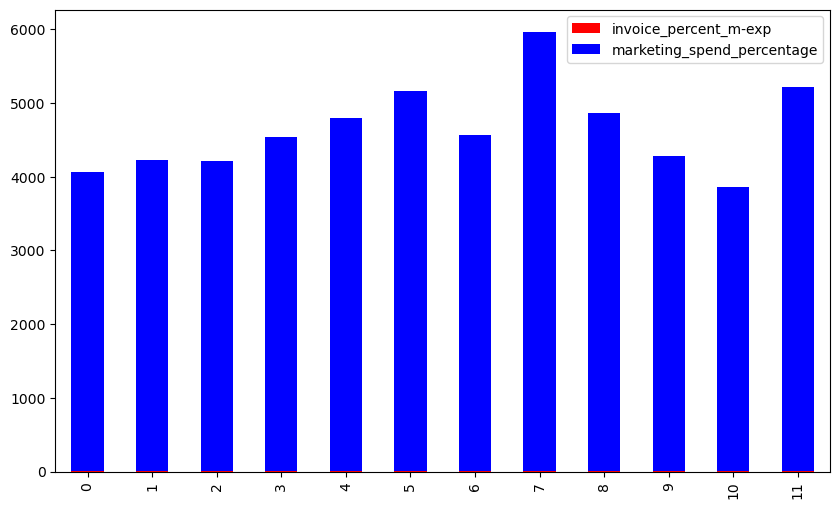

In [97]:
monthly_summary[['invoice_percent_m-exp','marketing_spend_percentage']].plot(kind='bar',stacked=True,color=['red','blue'],figsize=(10,6))

How marketing spend is impacting on revenue

In [82]:
merge_frame.columns

Index(['customerid', 'transaction_id', 'transaction_date', 'product_sku',
       'product_description', 'product_category', 'quantity', 'avg_price',
       'delivery_charges', 'coupon_status', 'transaction_month', 'coupon_code',
       'discount_pct', 'gst', 'offline_spend', 'online_spend', 'invoice_value',
       'acquisition_month', 'tax_paid', 'total_markerting_exp'],
      dtype='object')

In [83]:
marketing_impact_summary = merge_frame.groupby('transaction_month')[['online_spend','offline_spend','invoice_value','total_markerting_exp']].sum()

In [84]:
marketing_impact_summary.reset_index(inplace=True)

In [85]:
marketing_impact_summary['invoice_value'].corr(marketing_impact_summary['offline_spend']).__round__(2)

0.71

In [86]:
marketing_impact_summary['online_spend'].corr(marketing_impact_summary['invoice_value']).__round__(2)

0.67

In [87]:
marketing_impact_summary['total_markerting_exp'].corr(marketing_impact_summary['invoice_value']).__round__(2)

0.71

we can observe that the marketing expenses(online,offline) and  invoice value has a moderate degree of relationship between the two variables. It's not extremely strong, but it's not weak either.
But we have to consider that correlation doesnt mean causation

Vizualizing the impact

In [88]:
marketing_impact_summary.columns

Index(['transaction_month', 'online_spend', 'offline_spend', 'invoice_value',
       'total_markerting_exp'],
      dtype='object')

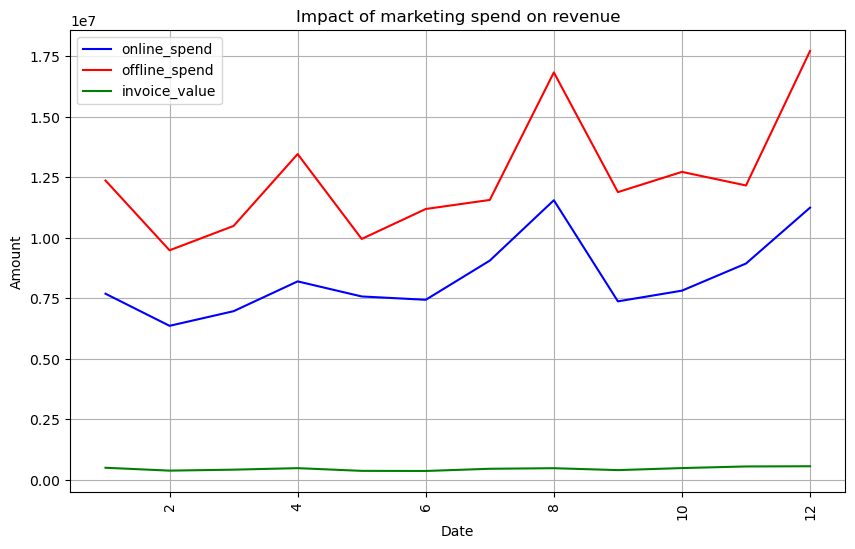

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(marketing_impact_summary['transaction_month'], marketing_impact_summary['online_spend'], label='online_spend', color='blue')
plt.plot(marketing_impact_summary['transaction_month'], marketing_impact_summary['offline_spend'], label='offline_spend', color='red')
plt.plot(marketing_impact_summary['transaction_month'], marketing_impact_summary['invoice_value'], label='invoice_value', color='green')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Impact of marketing spend on revenue')

plt.legend()
plt.grid(True)

plt.xticks(rotation=90)

plt.show()

we have observed previously that there was a moderate positive correlation between the variables but we cant observe any such impact 

Which product was appeared in the transactions?

In [90]:
merge_frame['product_category'].unique()

array(['Nest-USA', 'Apparel', 'Fun', 'Headgear', 'Bags', 'Drinkware',
       'Waze', 'Lifestyle', 'Office', 'Notebooks & Journals', 'Google',
       'Nest-Canada', 'Backpacks', 'Bottles', 'Gift Cards', 'More Bags',
       'Housewares', 'Android', 'Accessories', 'Nest'], dtype=object)

In [91]:
merge_frame['product_description'].unique()

array(['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel',
       "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
       'YouTube Luggage Tag', 'Google Trucker Hat',
       'Collapsible Shopping Bag', "Google Women's Yoga Jacket Black",
       'Android Rise 14 oz Mug',
       'Android Glass Water Bottle with Black Sleeve',
       'Nest Protect Smoke + CO White Battery Alarm-USA',
       'Waze Mobile Phone Vent Mount',
       "Google Men's Short Sleeve Hero Tee Heather",
       'Nest Cam Outdoor Security Camera - USA', '7&quot; Dog Frisbee',
       "YouTube Men's Fleece Hoodie Black",
       'Nest Cam Indoor Security Camera - USA',
       "Google Women's Lightweight Microfleece Jacket",
       "Google Women's Short Sleeve Hero Tee Sky Blue",
       'Engraved Ceramic Google Mug', 'Reusable Shopping Bag',
       'Google Laptop and Cell Phone Stickers',
       'Switch Tone Color Crayon Pen', 'Google Kick Ball', 'Maze Pen',
       'Compact Selfie Stick', 'Red Shine 15 oz Mug',

Which product was purchased mostly based on the quantity?

In [92]:
merge_frame[merge_frame['quantity']==900]

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,transaction_month,coupon_code,discount_pct,gst,offline_spend,online_spend,invoice_value,acquisition_month,tax_paid,total_markerting_exp
42456,14541,40835,2019-10-16,GGOEGGOA017399,Maze Pen,Office,900,0.99,12.99,Used,10,OFF10,0.1,0.1,2500,1218.6,895.08,10,89.1,3718.6


top 10 products that was purchased mostly based on the quantity?

In [93]:
merge_frame.sort_values('quantity',ascending=False).head(10)

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,transaction_month,coupon_code,discount_pct,gst,offline_spend,online_spend,invoice_value,acquisition_month,tax_paid,total_markerting_exp
42456,14541,40835,2019-10-16,GGOEGGOA017399,Maze Pen,Office,900,0.99,12.99,Used,10,OFF10,0.1,0.10,2500,1218.60,895.0800,10,89.1000,3718.60
20992,16782,29657,2019-06-05,GGOEGGOA017399,Maze Pen,Office,825,0.79,85.33,Used,6,OFF30,0.3,0.10,3500,3202.10,587.1775,6,65.1750,6702.10
21364,17858,29898,2019-06-08,GGOEGGOA017399,Maze Pen,Office,825,0.79,85.33,Used,6,OFF30,0.3,0.10,3500,1598.46,587.1775,6,65.1750,5098.46
30192,15194,34429,2019-08-02,GGOEGHPJ080310,Google Blackout Cap,Headgear,791,13.29,6.00,Used,8,HGEAR20,0.2,0.05,1500,2155.96,8836.4076,8,525.6195,3655.96
12173,13113,24863,2019-04-05,GGOEGHGH019699,Google Sunglasses,Lifestyle,750,3.50,6.50,Used,4,EXTRA10,0.1,0.18,2500,2342.68,2794.2500,4,472.5000,4842.68
42941,15110,41214,2019-10-20,GGOEGGOA017399,Maze Pen,Office,600,0.99,19.99,Used,10,OFF10,0.1,0.10,2500,2827.25,608.0500,10,59.4000,5327.25
33422,17365,35967,2019-08-18,GGOEGGOA017399,Maze Pen,Office,600,0.79,106.38,Used,8,OFF20,0.2,0.10,3500,1696.64,523.5000,8,47.4000,5196.64
5544,15351,20374,2019-02-14,GGOEGBJC019999,Collapsible Shopping Bag,Bags,600,4.99,6.50,Clicked,2,AIO20,0.2,0.18,3000,830.68,3539.4200,2,538.9200,3830.68
30795,15601,34709,2019-08-04,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,600,2.39,190.42,Clicked,8,OFF20,0.2,0.10,1500,2688.98,1767.8200,8,143.4000,4188.98
12176,13113,24863,2019-04-05,GGOEGOCB017499,Leatherette Journal,Office,600,10.99,6.50,Clicked,4,OFF10,0.1,0.10,2500,2342.68,7259.9000,4,659.4000,4842.68


In [94]:
# merge_frame.to_csv('cleaned_data\merge_frame.csv',index=False)